# CV2 in Depth

## Image Thresholding

### Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function.

retval, dst	=	cv.threshold(	src, thresh, maxval, type[, dst]	)<br><br>

Applies a fixed-level threshold to each array element.<br><br>

The function applies fixed-level thresholding to a multiple-channel array. The function is typically used to get a bi-level (binary) image out of a grayscale image ( compare could be also used for this purpose) or for removing a noise, that is, filtering out pixels with too small or too large values. There are several types of thresholding supported by the function. They are determined by type parameter.<br><br>

Also, the special values THRESH_OTSU or THRESH_TRIANGLE may be combined with one of the above values. In these cases, the function determines the optimal threshold value using the Otsu's or Triangle algorithm and uses it instead of the specified thresh.<br><br>

Note<br>
Currently, the Otsu's and Triangle methods are implemented only for 8-bit single-channel images.<br><br>

Parameters<br>
src	input array (multiple-channel, 8-bit or 32-bit floating point).<br>
dst	output array of the same size and type and the same number of channels as src.<br>
thresh	threshold value.<br>
maxval	maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.<br>
type	thresholding type (see ThresholdTypes).<br><br>
Returns<br>
the computed threshold value if Otsu's or Triangle methods used.

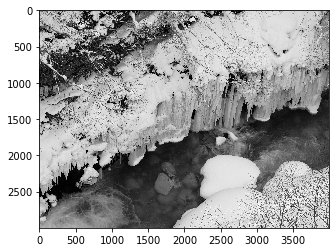

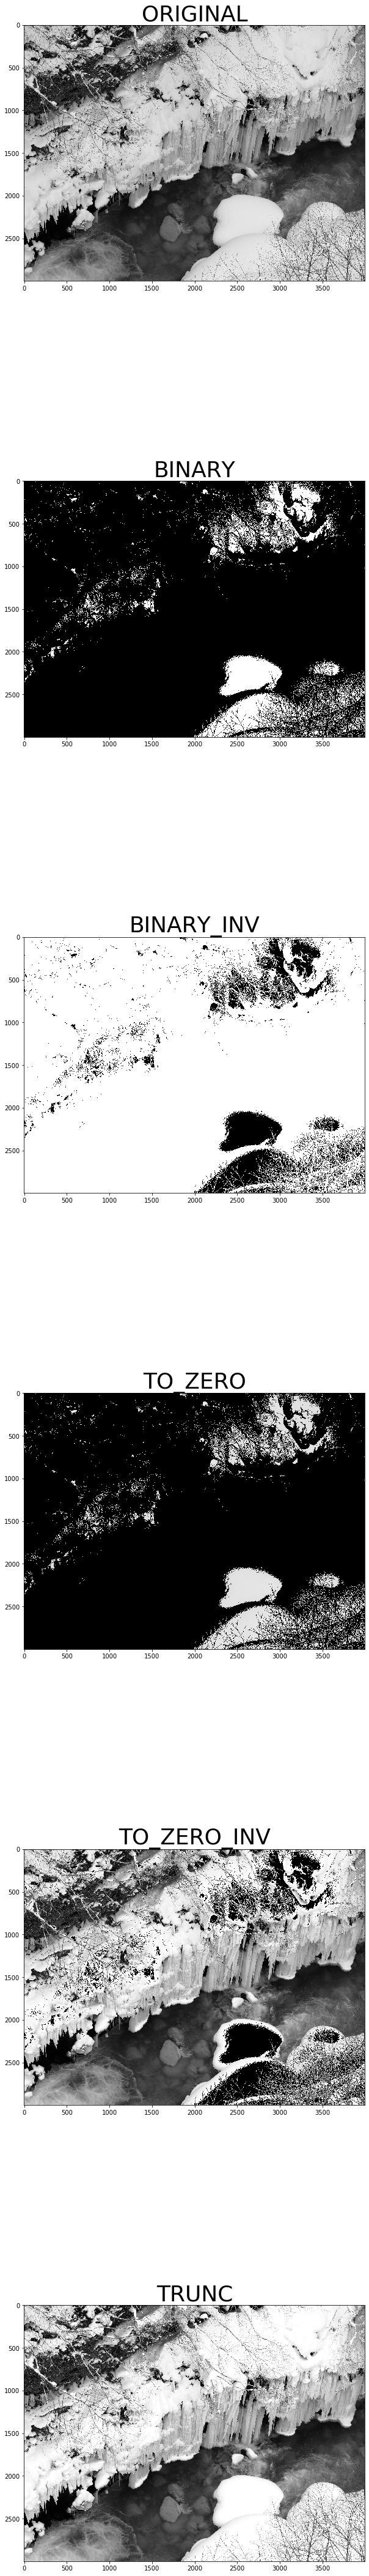

In [17]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

path = './Sample Images/ice.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(X=img, aspect='equal', origin='upper', cmap='gray')

# DEBUGGING PURPOSES ONLY
if not __debug__:
    temp = cv2.threshold(src=img, thresh=0, maxval=120, type=cv2.THRESH_BINARY)
    print(type(temp))
    print(temp)

threshold_dict = {'ORIGINAL': (None, img),
                  'BINARY': cv2.threshold(src=img, thresh=220, maxval=255, type=cv2.THRESH_BINARY),
                  'BINARY_INV': cv2.threshold(src=img, thresh=220, maxval=255, type=cv2.THRESH_BINARY_INV),
                  'TO_ZERO': cv2.threshold(src=img, thresh=220, maxval=255, type=cv2.THRESH_TOZERO),
                  'TO_ZERO_INV': cv2.threshold(src=img, thresh=220, maxval=255, type=cv2.THRESH_TOZERO_INV),
                  'TRUNC': cv2.threshold(src=img, thresh=220, maxval=255, type=cv2.THRESH_TRUNC)}

fig, axes = plt.subplots(nrows=len(threshold_dict), ncols=1, figsize=(10, 80))
for index, threshold in enumerate(threshold_dict.keys(), start=0):
    """Print each thresholded image"""
    axes[index].set_title(label=threshold, size=36)
    axes[index].imshow(X=threshold_dict[threshold][1], aspect='equal', origin='upper', cmap='gray')


### Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst<br><br>

Parameters:<br>	
src – Source 8-bit single-channel image.<br>
dst – Destination image of the same size and the same type as src.<br>
maxValue – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.<br>
adaptiveMethod – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.<br>
thresholdType – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV.<br>
blockSize – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.<br>
C – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

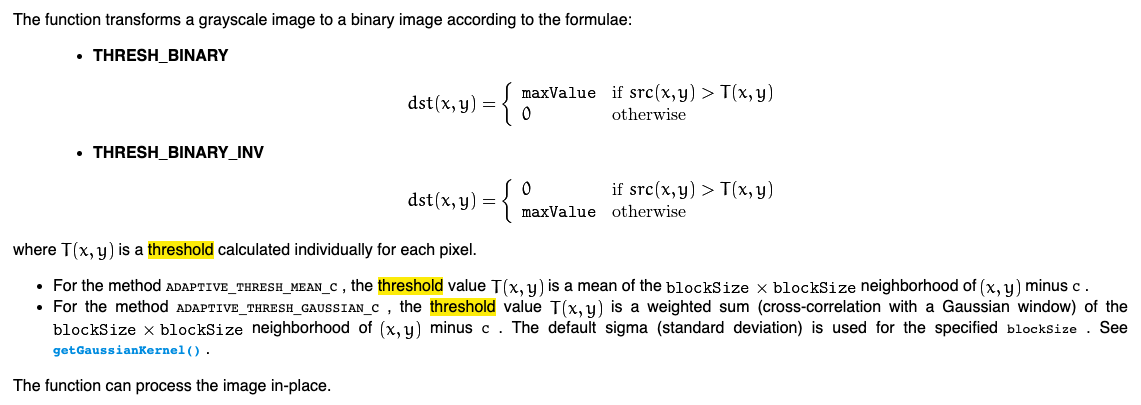

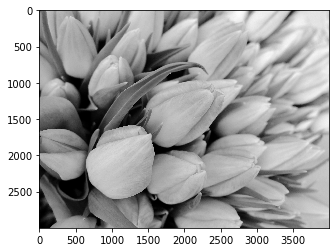

In [74]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = './Sample Images/tulip.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(X=img, aspect='equal', origin='upper', cmap='gray')


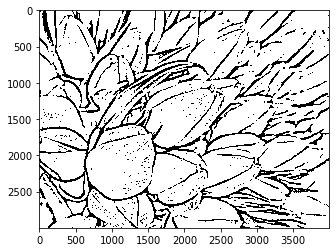

In [135]:

img_mean = cv2.adaptiveThreshold(src=cv2.medianBlur(src=img, ksize=5),
                                 maxValue=255,
                                 adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                                 thresholdType=cv2.THRESH_BINARY,
                                 blockSize=61,
                                 C=5)

plt.imshow(img_mean, cmap='gray')


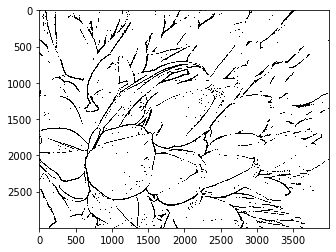

In [134]:

img_gaussian = cv2.adaptiveThreshold(src=cv2.medianBlur(src=img, ksize=5),
                                 maxValue=255,
                                 adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 thresholdType=cv2.THRESH_BINARY,
                                 blockSize=61,
                                 C=5)

plt.imshow(img_gaussian, cmap='gray')


### Otsu’s Binarization

In the first section, I told you there is a second parameter retVal. Its use comes when we go for Otsu’s Binarization. So what is it?<br><br>

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)<br><br>

For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

In [160]:

import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

path = './Sample Images/ice.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_blurred = cv2.medianBlur(src=img, ksize=15)
res, img_otsu = cv2.threshold(src=img_blurred, thresh=0, maxval=255, type=cv2.THRESH_OTSU)

# plotting each step of otsu's binarization
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 60))
axes[0].imshow(X=img, aspect='equal', origin='upper', cmap='gray')
axes[0].set_title(label='Original', size=36)
axes[1].imshow(X=img_blurred, aspect='equal', origin='upper', cmap='gray')
axes[1].set_title(label='Median Blur', size=36)
axes[2].imshow(X=img_otsu, aspect='equal', origin='upper', cmap='gray')
axes[2].set_title(label='Otsu Thresholded', size=36)


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/thresh.cpp:1529: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'threshold'


## Smoothing Images

### 2D Convolution ( Image Filtering )

Averaging

This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter(). 

cv2.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) → dst<br><br>
Parameters<br>
src – input image.<br>
dst – output image of the same size and type as src.<br>
ddepth – the output image depth (-1 to use src.depth()).<br>
ksize – blurring kernel size.<br>
anchor – anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.<br>
normalize – flag, specifying whether the kernel is normalized by its area or not.<br>
borderType – border mode used to extrapolate pixels outside of the image. The function smoothes an image using the kernel:

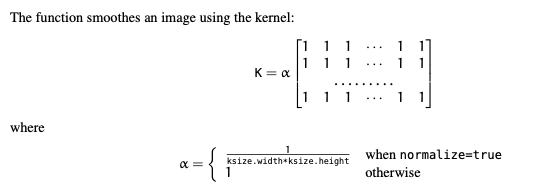

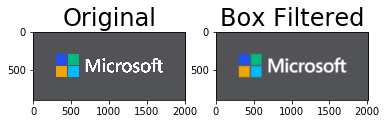

In [179]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

path = './Sample Images/microsoft.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)

# plotting
plt.subplot(121)
plt.title(label='Original', size=24)
plt.imshow(X=img, aspect='equal', origin='upper')

img_box = cv2.boxFilter(src=img, ddepth=10, ksize=(20, 20))
plt.subplot(122)
plt.title(label='Box Filtered', size=24)
plt.imshow(X=img_box, aspect='equal', origin='upper')


Gaussian Filtering

In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) → dst<br><br>

Parameters<br>
src – input image; the image can have any number of channels, which are processed inde- pendently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
dst – output image of the same size and type as src.<br>
ksize – Gaussian kernel size. ksize.width and ksize.height can differ but they both
must be positive and odd. Or, they can be zero’s and then they are computed from sigma*.<br>
sigmaX – Gaussian kernel standard deviation in X direction.<br>
sigmaY – Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height , respectively (see getGaussianKernel() for details); to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.<br>
borderType – pixel extrapolation method (see borderInterpolate() for details).

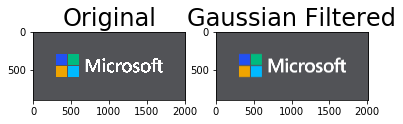

In [186]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

path = './Sample Images/microsoft.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_gaussian = cv2.GaussianBlur(src=img, ksize=(21, 21), sigmaX=2, sigmaY=8)

plt.subplot(121)
plt.title(label='Original', size=24)
plt.imshow(X=img, aspect='equal', origin='upper')

plt.subplot(122)
plt.title(label='Gaussian Filtered', size=24)
plt.imshow(X=img_gaussian, aspect='equal', origin='upper')


Median Filtering

Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

cv2.medianBlur(src, ksize[, dst ]) → dst<br><br>
Parameters<br>
src – input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.<br>
dst – destination array of the same size and type as src.<br>
ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...<br><br>

The function smoothes an image using the median filter with the ksize × ksize aperture. Each channel of a multi-channel image is processed independently. In-place operation is supported.

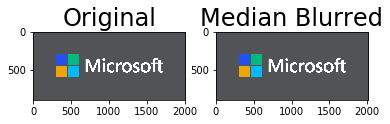

In [187]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

path = './Sample Images/microsoft.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_median = cv2.medianBlur(src=img, ksize=15)

plt.subplot(121)
plt.title(label='Original', size=24)
plt.imshow(X=img, aspect='equal', origin='upper')

plt.subplot(122)
plt.title(label='Median Blurred', size=24)
plt.imshow(X=img_median, aspect='equal', origin='upper')


Bilateral Filtering

As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter, cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.<br><br>

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

cv2.bilateralFilter(src,d,sigmaColor,sigmaSpace[,dst[,borderType]])→dst<br><br>

Parameters<br>
src – Source 8-bit or floating-point, 1-channel or 3-channel image. dst – Destination image of the same size and type as src.<br>
d – Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.<br>
sigmaColor – Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace ) will be mixed together, resulting in larger areas of semi-equal color.<br>
sigmaSpace – Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0 , it specifies the neighborhood size regardless of sigmaSpace . Otherwise, d is proportional to sigmaSpace.

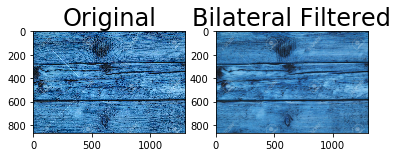

In [201]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

path = './Sample Images/floorboard.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_bilateral = cv2.bilateralFilter(src=img, d=10, sigmaColor=300, sigmaSpace=100)

# plotting
plt.subplot(121)
plt.title(label='Original', size=24)
plt.imshow(X=img, aspect='equal', origin='upper')

plt.subplot(122)
plt.title(label='Bilateral Filtered', size=24)
plt.imshow(X=img_bilateral, aspect='equal', origin='upper')
